### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Initializing file names and k value
train_file = 'data/iristrain.csv'
test_file = 'data/iristest.csv'

k = 3

### Reading data from csv

In [3]:
df_train = pd.read_csv(train_file, index_col=0)
df_test = pd.read_csv(test_file, index_col=0)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  100 non-null    float64
 1   Sepal.Width   100 non-null    float64
 2   Petal.Length  100 non-null    float64
 3   Petal.Width   100 non-null    float64
 4   Species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 4 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  50 non-null     float64
 1   Sepal.Width   50 non-null     float64
 2   Petal.Length  50 non-null     float64
 3   Petal.Width   50 non-null     float64
 4   Species       50 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [6]:
df_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
nr,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa


In [7]:
df_train['Species'].value_counts()

setosa        34
versicolor    33
virginica     33
Name: Species, dtype: int64

In [8]:
df_test['Species'].value_counts()

versicolor    17
virginica     17
setosa        16
Name: Species, dtype: int64

### Visualizing data

<Figure size 432x288 with 0 Axes>

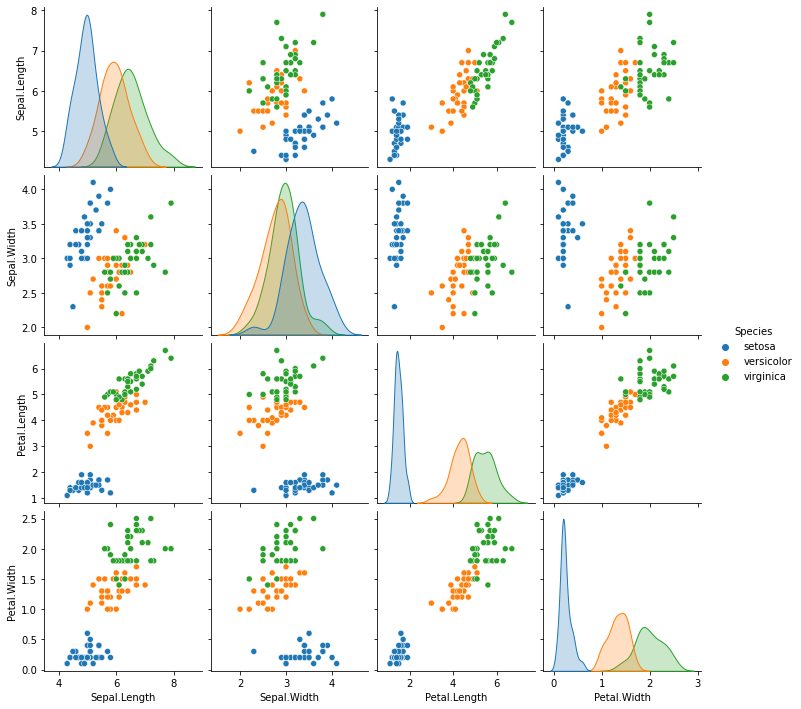

In [9]:
plt.figure()
sns.pairplot(df_train, hue='Species')
plt.show()

array([[<AxesSubplot:title={'center':'Petal.Length'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'Petal.Width'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'Sepal.Length'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'Sepal.Width'}, xlabel='[Species]'>]],
      dtype=object)

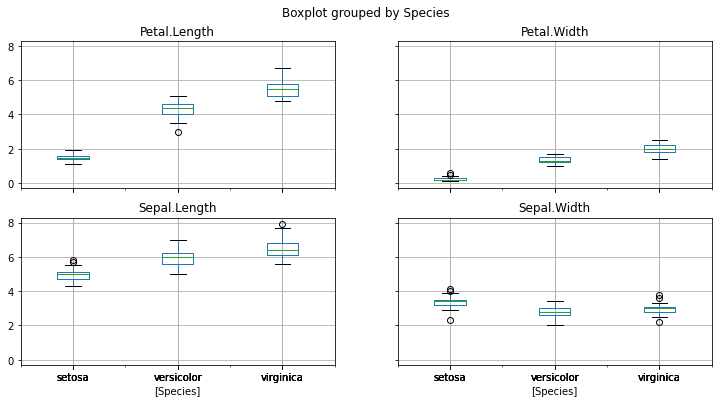

In [10]:
df_train.boxplot(by="Species", figsize=(12, 6))

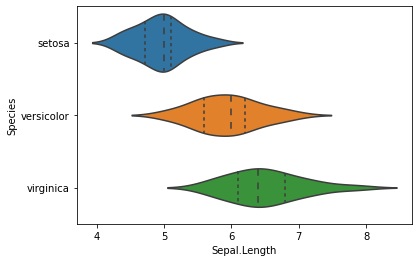

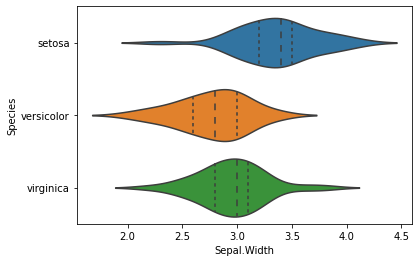

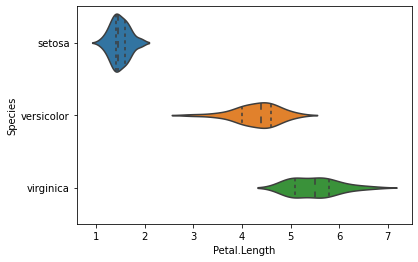

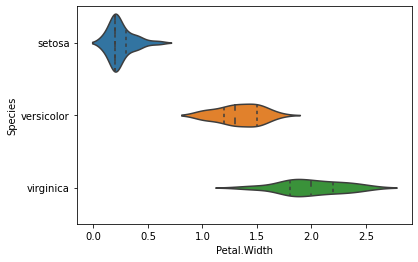

In [11]:
sns.violinplot(y='Species', x='Sepal.Length', data=df_train, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='Sepal.Width', data=df_train, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='Petal.Length', data=df_train, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='Petal.Width', data=df_train, inner='quartile')
plt.show()

### K-Nearest Neighbors algorithm

In [12]:
train_array = df_train.to_numpy()
test_array = df_test.to_numpy()

In [13]:
def calculate_euclidean_distance(x1, x2):
    distance = 0
    
    for i in range(len(x1) - 1):
        distance += (x1[i] - x2[i])**2
        
    return sqrt(distance)

In [14]:
def get_nearest_neighbors(train_array, test_row, k):
    distances = []
    data = []
    
    for train_row in train_array:
        distance = calculate_euclidean_distance(test_row, train_row)
        distances.append(distance)
        data.append(train_row)
    
    distances = np.array(distances)    
    data = np.array(data)
    distances_indices_sorted = distances.argsort()
    data = data[distances_indices_sorted]
    neighbors = data[:k]
    
    return neighbors

In [15]:
def predict_classification(train_array, test_row, k):
    neighbors = get_nearest_neighbors(train_array, test_row, k)
    output_values = [row[-1] for row in neighbors]
    prediction = max(output_values, key=output_values.count)
    
    return prediction

In [16]:
def get_correct_predictions(actual, predicted):
    correct = 0
    
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
            
    return correct

In [17]:
def get_test_set_predictions(k):
    actual = test_array[:, -1]
    predicted = []

    for test_row in test_array:
        prediction = predict_classification(train_array, test_row, k)
        predicted = np.append(predicted, prediction)
    
    correct = get_correct_predictions(actual, predicted)
    accuracy = correct / len(actual)
    
    return correct, accuracy
    
def evaluate_model(k):
    correct, accuracy = get_test_set_predictions(k)
    print('Correct predictions: %d' % correct)
    print('Accuracy: {:.1%}'.format(accuracy))

In [18]:
evaluate_model(k)

Correct predictions: 48
Accuracy: 96.0%


In [19]:
# Calling for user input vector
def get_user_input():
    print('Enter vector values: ')
    vector = []
    size = test_array[0].size - 1
    
    for i in range(size):
        vector.append(float(input('Value: ')))
        
    vector = np.array(vector)
    return vector

In [20]:
def predict_user_input():
    prediction = predict_classification(train_array, get_user_input(), k)
    print('Predicted iris: ' + prediction)

In [21]:
predict_user_input()

Enter vector values: 
Value: 6.0
Value: 2.9
Value: 1.7
Value: 3.4
Predicted iris: setosa


### Plotting accuracy by different values of k

Text(0, 0.5, 'Accuracy')

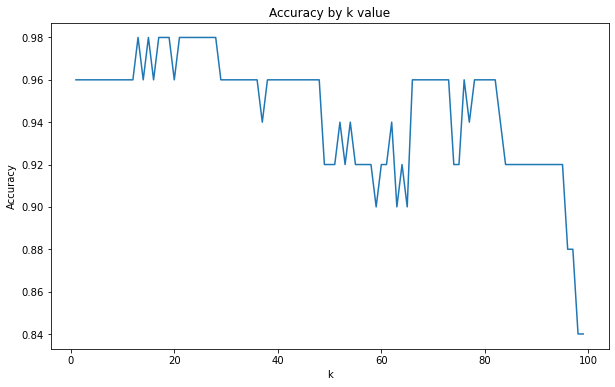

In [22]:
accuracies = []

for k in range(1,100):
    correct, accuracy = get_test_set_predictions(k)
    accuracies.append(accuracy)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,100), accuracies)
plt.title('Accuracy by k value')
plt.xlabel('k')
plt.ylabel('Accuracy')